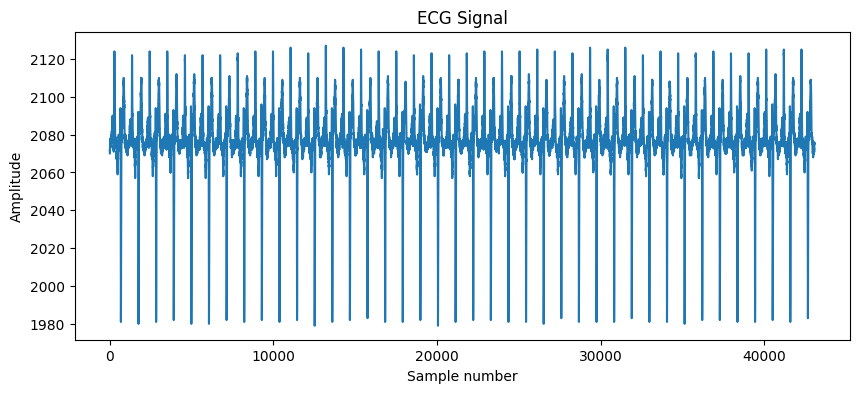

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Replace with the path to your .dat file
file_path = r'C:\Users\mohit\OneDrive\Desktop\remove_background\ecg\dataset\aami3a.dat'

# Read the data into a numpy array.
# This assumes each sample is a 16-bit signed integer.
data = np.fromfile(file_path, dtype=np.int16)

# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('ECG Signal')
plt.ylabel('Amplitude')
plt.xlabel('Sample number')
plt.show()

In [5]:
len(data)

43081

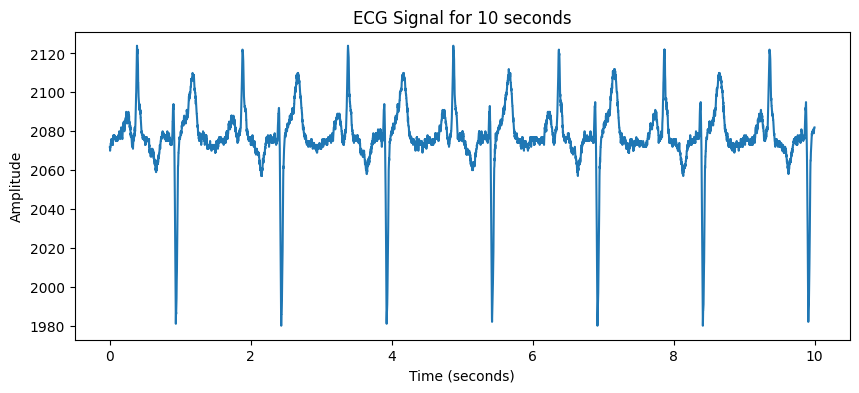

In [6]:

# Sampling frequency (in Hz)
fs = 720

# Time duration you want to view (in seconds)
duration = 10

# Calculate the number of samples to view
n_samples = fs * duration

# Select only the first n_samples samples from the data
subset = data[:n_samples]

# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(np.arange(n_samples)/fs, subset)  # x values are in seconds now
plt.title('ECG Signal for 10 seconds')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.show()

In [8]:
from scipy.signal import butter, filtfilt

# Define the filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Apply the bandpass filter
lowcut  = 0.5 # in Hz
highcut = 50  # in Hz
filtered_data = butter_bandpass_filter(data, lowcut, highcut, fs)

# Normalize the data
normalized_data = (filtered_data - np.mean(filtered_data)) / np.std(filtered_data)

# Now try again with the filtered and normalized data
wd, m = hp.process(normalized_data, sample_rate=720.0)

# Print calculated heart rate
heart_rate = m['bpm']
print("Heart Rate is: ", heart_rate, "bpm")


Heart Rate is:  80.15971814445098 bpm


In [9]:
# compute the standard deviation of the signal
signal_std = np.std(data)
print('Standard deviation of the signal is: ', signal_std)


Standard deviation of the signal is:  16.062733944113496


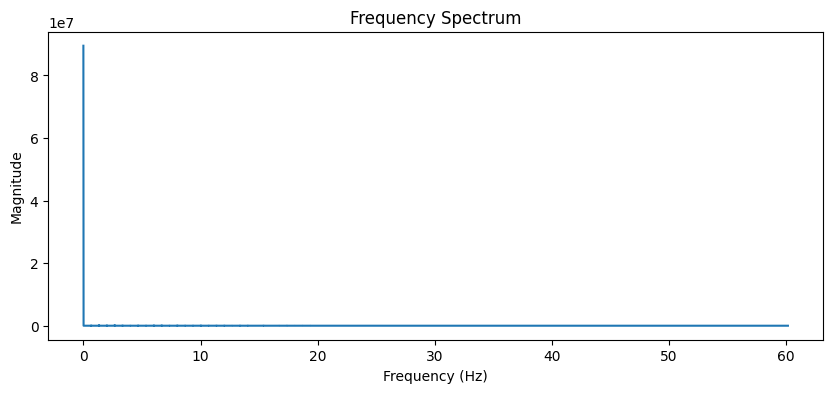

In [10]:
from scipy.fft import fft

# perform the FFT
fft_vals = fft(data)

# calculate absolute value to get magnitude
fft_abs = np.abs(fft_vals)

# create an array of frequency bins
freqs = np.fft.fftfreq(len(data)) * fs

# plot the spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs[:n_samples//2], fft_abs[:n_samples//2])  # only plot up to the Nyquist frequency
plt.title('Frequency Spectrum')
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')
plt.show()


In [11]:
# get RR-intervals (distance between R-peaks)
rr_list = np.diff(wd['peaklist']) / fs * 1000.0  # calculate in ms

# print the first 5 RR-intervals
print('First 5 RR-intervals: ', rr_list[:5])

# calculate HRV
hrv = np.std(rr_list)
print('Heart Rate Variability (HRV): ', hrv)


First 5 RR-intervals:  [788.88888889 708.33333333 784.72222222 709.72222222 786.11111111]
Heart Rate Variability (HRV):  87.43517322716676


In [13]:
from biosppy.signals import ecg

out = ecg.ecg(signal=filtered_data, sampling_rate=fs, show=False)
rpeaks = out['rpeaks']


In [14]:
pwaves = out['pwaves']
twaves = out['twaves']


KeyError: "Unknown key: 'pwaves'."

In [15]:
rpeaks

array([  649,  1726,  2803,  3881,  4957,  6034,  7111,  8189,  9266,
       10343, 11420, 12498, 13575, 14652, 15729, 16806, 17883, 18961,
       20036, 21115, 22191, 23268, 24346, 25423, 26500, 27577, 28654,
       29731, 30809, 31886, 32963, 34040, 35117, 36194, 37271, 38348,
       39425, 40502, 41579, 42657])

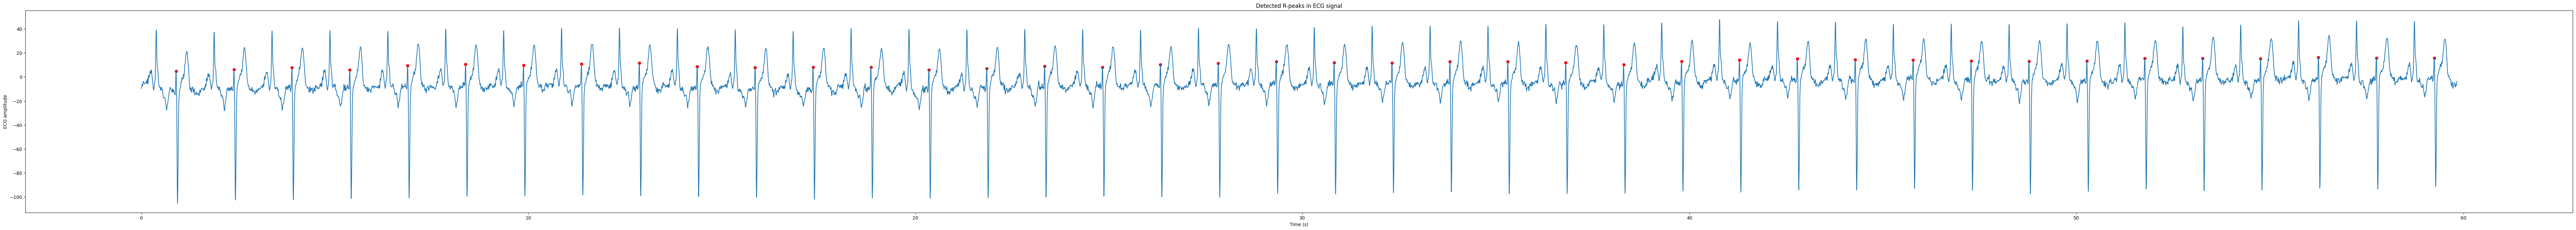

In [19]:
import matplotlib.pyplot as plt

# Assume 'out' is the output of the biosppy.ecg.ecg() function

# Calculate time values in seconds
times = np.arange(filtered_data.shape[0], dtype='float') / fs

plt.figure(figsize=(100, 8))
plt.plot(times, filtered_data)

# Plot R-peaks
plt.scatter(times[out['rpeaks']], filtered_data[out['rpeaks']], color='red')

plt.title('Detected R-peaks in ECG signal')
plt.xlabel('Time (s)')
plt.ylabel('ECG amplitude')
plt.show()


In [20]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

# Assume 'data' is your ECG signal and 'fs' is the sampling rate
# data = np.fromfile('yourfile.dat', dtype=np.float32)



TypeError: tuple indices must be integers or slices, not str

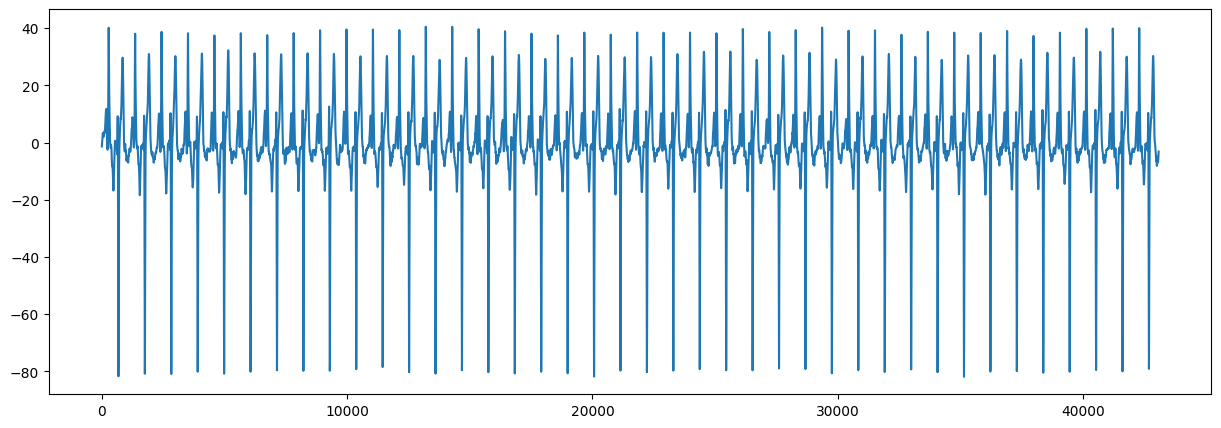

In [22]:
# Clean the raw ECG signal
ecg_cleaned = nk.ecg_clean(data, sampling_rate=fs)

# Find the R-peaks
rpeaks = nk.ecg_findpeaks(ecg_cleaned, sampling_rate=fs, method="neurokit")

# Find the other ECG peaks
peaks = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=fs, method="dwt")

# Plot the processed ECG signal with R, Q, S peaks
plt.figure(figsize=(15, 5))
plt.plot(ecg_cleaned, label="ECG Signal")
plt.scatter(peaks['ECG_R_Peaks'], ecg_cleaned[peaks['ECG_R_Peaks']], color='red', label='R-peaks')
plt.scatter(peaks['ECG_P_Peaks'], ecg_cleaned[peaks['ECG_P_Peaks']], color='green', label='P-peaks')
plt.scatter(peaks['ECG_Q_Peaks'], ecg_cleaned[peaks['ECG_Q_Peaks']], color='blue', label='Q-peaks')
plt.scatter(peaks['ECG_S_Peaks'], ecg_cleaned[peaks['ECG_S_Peaks']], color='magenta', label='S-peaks')
plt.scatter(peaks['ECG_T_Peaks'], ecg_cleaned[peaks['ECG_T_Peaks']], color='cyan', label='T-peaks')

plt.legend(loc='best')
plt.title("ECG Peaks")
plt.xlabel("Samples")
plt.ylabel("Voltage (mV)")
plt.show()


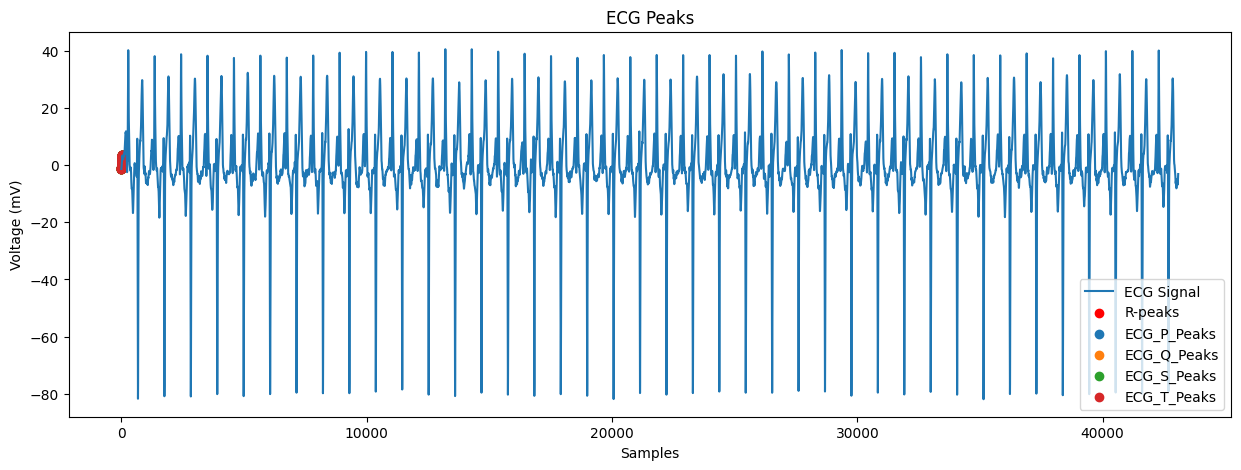

In [29]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

# Assume 'data' is your ECG signal and 'fs' is the sampling rate
# data = np.fromfile('yourfile.dat', dtype=np.float32)

# Clean the raw ECG signal
ecg_cleaned = nk.ecg_clean(data, sampling_rate=fs)

# Find the R-peaks
_, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=fs)

# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=fs, method="dwt")

# Plot the processed ECG signal with R, P, Q, S, T peaks
plt.figure(figsize=(15, 5))
plt.plot(ecg_cleaned, label="ECG Signal")

# Plot the R-peaks
plt.scatter(np.where(rpeaks['ECG_R_Peaks'])[0], ecg_cleaned[np.where(rpeaks['ECG_R_Peaks'])[0]], color='red', label='R-peaks')
    
# Plot the other peaks if they were successfully detected
for wave in ['ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks', 'ECG_T_Peaks']:
    if wave in waves_peak:
        plt.scatter(np.where(waves_peak[wave])[0], ecg_cleaned[np.where(waves_peak[wave])[0]], label=wave)

plt.legend(loc='best')
plt.title("ECG Peaks")
plt.xlabel("Samples")
plt.ylabel("Voltage (mV)")
plt.show()
